In [1]:
import mylibrary.nnlib as nn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Least squares

In [188]:
def regression(x,y):
    n = len(x)
    sy = np.sum(y)
    sx = np.sum(x)
    sx2 = np.sum(np.square(x))
    sxy = np.sum(x*y)

    # y = mx+c
    z = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy)/z
    c = (sy*sx2 - sx*sxy)/z
    return m, c

def output(x, m, c):
    return m*x+c

def error(target, output):
    return np.sqrt(np.square(target-output).mean())

In [189]:
# #Define a simple range of values for x and reshape so sklearn likes it.
# x = np.linspace(0,1,200)
# noise = np.random.normal(0,0.02, x.shape)
# x = x + noise
# y= 2.5*x + 0.5
# noise = np.random.normal(0,0.1, x.shape)
# y = y + noise
# x = x - x.mean()

In [190]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - x.mean()

In [191]:
x.mean()

0.0

In [192]:
n = len(x)

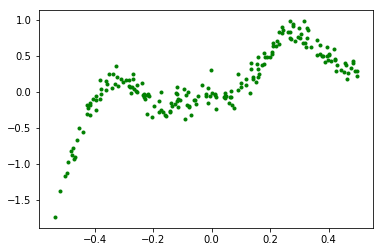

In [193]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')

In [219]:
m_ = np.random.exponential()*2
c_ = np.random.randn()
print(m,c_)
mt, mr = np.copy(m_), np.copy(m_)
ct, cr = np.copy(c_), np.copy(c_)

1.1548221455909486 -1.3416235888820116


In [220]:
m, c = regression(x, y)
ytarg = m*x+c
learning_rate = 1 #0.3

m, c

(1.1548221455909486, 0.12451078487708254)

In [221]:
# mt = np.copy(m) + 2
# ct = 10

In [222]:
import collections

In [223]:
%matplotlib tk
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1,2,2)

plt.ion()
fig.show()
fig.canvas.draw()

range_ = 500
losscurv = collections.deque(maxlen=range_)
dmcurv = collections.deque(maxlen=range_)
dccurv = collections.deque(maxlen=range_)
ccurv = collections.deque(maxlen=range_)
mcurv = collections.deque(maxlen=range_)

# x_ = x - x.mean()

for step in range(1000000):
    # traditional first
    yt = mt*x + ct
    dyt = yt - y
    dct = dyt.mean()
    dmt = x.T.dot(dyt)/n
    dxt = dyt*mt
    
    yr = mr*x + cr
#     yr = mr*x_ + cr
#     yr = mr*x + ct
    dyr = yr - y
    dcr = dyr.mean()
#     dmr = (1/x).T.dot(dyr)/n
    dmr = x.T.dot(dyr - dcr)/(x**2).sum()
    dxr = dyr/mr
    
    
    losscurv.append((dyr**2).mean())
    dmcurv.append(dmr)
    dccurv.append(dcr)
    mcurv.append(mr)
    ccurv.append(cr)
    
    if step%10==0:
        print('_______________________')
        print("epoch trad, rev", step)
        print("m  c", m, c)
        print("mt mr", mt, mr)
        print("ct cr", ct, cr)
        print("Loss", (dyt**2).mean(), (dyr**2).mean())
        print("dm  ", dmt, dmr)
        print("dc  ", dct, dcr)

        ax.clear()
        ax1.clear()
        ax.scatter(x, y, marker='.', c='g', label='x,y')
        ax.scatter(x, ytarg, marker='*', c='r', lw=1, label='x,ytarg')
        ax.scatter(x, yt, marker='.', c='m', lw=1, label='x,yt')
        ax.scatter(x, dxt, marker='.', c='lime', lw=1, label='x,dxr')
        
        ax.scatter(x, yr, marker='.', c='purple', lw=1, label='x,yr')
        ax.scatter(x, dxr, marker='.', c='c', lw=1, label='x,dxr')
        plt.plot(x, np.zeros_like(x), c='b', lw=1)
        ax1.plot(losscurv, label='error')
        ax1.plot(dmcurv, label='dm', color='r')
        ax1.plot(dccurv, label='dc', color='orange')
        ax1.plot(mcurv, label='m', color='m', marker='_')
        ax1.plot(ccurv, label='c', color='y', marker='_')
        
        
        
        
        plt.legend()
        fig.canvas.draw()
        plt.pause(1)
        print("\n")


    mt = mt - learning_rate*dmt
    ct = ct - learning_rate*dct
    if step == 0: # this can also be done in 2 steps, dc-1, dm-2
        cr = cr - learning_rate*dcr
        mr = mr - learning_rate*dmr
    
#     mr = mr - learning_rate*dmr
#     cr = cr - learning_rate*dcr
###     the revised version does not seem to require learning rate
#     mr = mr - dmr
#     cr = cr - dcr
    

    if (dyt**2).mean() < 0.0025:
        print('fitted to our expectation')
        plt.pause(10)
        break

_______________________
epoch trad, rev 0
m  c 1.1548221455909486 0.12451078487708254
mt mr 0.3112717110949692 0.3112717110949692
ct cr -1.3416235888820116 -1.3416235888820116
Loss 2.298101659071177 2.298101659071177
dm   -0.07136835674202516 -0.8435504344959798
dc   -1.4661343737590942 -1.4661343737590942


_______________________
epoch trad, rev 10
m  c 1.1548221455909486 0.12451078487708254
mt mr 0.8063262289764772 1.1548221455909489
ct cr 0.12451078487708256 0.12451078487708256
Loss 0.09862404283814609 0.08834884881420665
dm   -0.02948440292718408 2.3620445861622744e-16
dc   0.0 -4.163336342344337e-18


_______________________
epoch trad, rev 20
m  c 1.1548221455909486 0.12451078487708254
mt mr 1.0108480582922723 1.1548221455909489
ct cr 0.12451078487708256 0.12451078487708256
Loss 0.09010258115896846 0.08834884881420665
dm   -0.012180888781212979 2.3620445861622744e-16
dc   -4.440892098500626e-18 -4.163336342344337e-18


_______________________
epoch trad, rev 30
m  c 1.1548221455

TclError: can't invoke "update" command: application has been destroyed

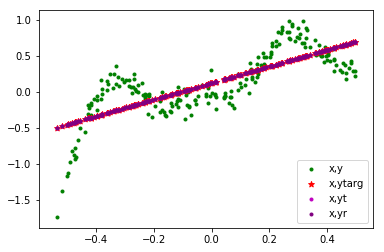

In [224]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, ytarg, marker='*', c='r', lw=1, label='x,ytarg')
plt.scatter(x, yt, marker='.', c='m', lw=1, label='x,yt')
plt.scatter(x, yr, marker='.', c='purple', lw=1, label='x,yr')
plt.legend()

In [225]:
dxr = (1/mr)*(dyr)
dxr.mean()

-4.440892098500626e-18

In [226]:
print(dmt, dmr)
print(dct, dcr)

-3.623696892413042e-09 2.3620445861622744e-16
-2.498001805406602e-18 -4.163336342344337e-18


In [77]:
## Observations
## if x is zero centered, the gradient will always remain zero if slope is right.
## if only b is updated at first and w second, we will optimize the regression in 2 steps

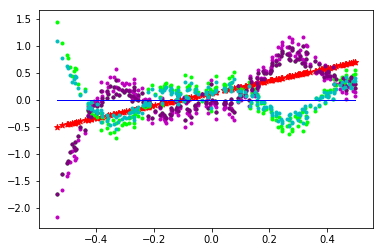

In [229]:
# checking dx

yt = mt*(x - dxt) + ct
dyt = yt - y
dct = dyt.mean()

yr = mr*(x - dxr) + cr
dyr = yr - y
dcr = dyr.mean()

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, ytarg, marker='*', c='r', lw=1, label='x,ytarg')

plt.scatter(x, yt, marker='.', c='m', lw=1, label='x,yt')
plt.scatter(x, dxt, marker='.', c='lime', lw=1, label='x,dxr')

plt.scatter(x, yr, marker='.', c='purple', lw=1, label='x,yr')
plt.scatter(x, dxr, marker='.', c='c', lw=1, label='x,dxr')
plt.plot(x, np.zeros_like(x), c='b', lw=1)